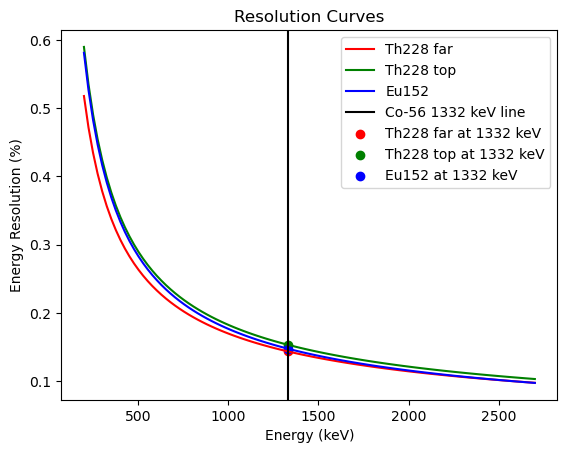

In [58]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  6 15:14:55 2024

@author: aravindremesansreekala
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.dates as md
import pandas as pd
from scipy.optimize import curve_fit

a = [0.63, 0.92, 0.91]
b = [2.2E-3, 2.34E-3, 2.2E-3]
c = [4.84E-8, 6.78E-8, 0.66E-8]

#col = ['r', 'g', 'b']
x = np.linspace(50, 2700, 100)

def relresolFunc1(E, a,b,c):
    relresol = np.sqrt(a/E**2 + b/E + c)
    return relresol

plt.plot(x_val, 100*relresolFunc1(x_val, a[0], b[0] ,c[0]), color = 'r', label = 'Th228 far')
plt.plot(x_val, 100*relresolFunc1(x_val, a[1], b[1] ,c[1]), color = 'g', label = 'Th228 top')
plt.plot(x_val, 100*relresolFunc1(x_val, a[2], b[2] ,c[2]), color = 'b', label = 'Eu152')
plt.axvline(x = 1332, color = 'k', label = 'Co-56 1332 keV line')
E_Co = 1332
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[0], b[0] ,c[0]), color = 'r', label = 'Th228 far at 1332 keV')
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[1], b[1] ,c[1]), color = 'g', label = 'Th228 top at 1332 keV')
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[2], b[2] ,c[2]), color = 'b', label = 'Eu152 at 1332 keV')
plt.legend()
plt.title('Resolution Curves')
plt.xlabel('Energy (keV)')
plt.ylabel('Energy Resolution (%)')
plt.show()


In [59]:
#Calibration curves
E_Th = [238.632, 277.370, 300.089, 583.187, 727.330, 763.450, 785.370, 860.530, 1620.738, 2614.511]
Th_resid_top = [0.137302, 0.121823, -0.135196, -0.037239, 0.068233, 0.528582, -0.892531, -0.104436, 0.237455, 0.076776]
Th_resid_top_err = [0.149034, 0.187999, 0.157951, 0.117981, 0.134341, 0.172408, 0.562805, 0.178431, 0.272789, 0.494183]
Th_resid_far = [0.113523, 0.162853, -0.094481, -0.020335, 0.028611, 0.669747, -0.955236, -0.293410, 0.186419, 0.222411]
Th_resid_far_err = [0.156270, 0.193362, 0.164064, 0.125488, 0.142860, 0.179665, 0.565109, 0.187229, 0.298707, 0.539773]
E_Eu = [121.7817, 244.6974, 344.2785, 778.9040, 867.3780, 964.0790, 1085.8690, 1112.0740, 1408.0060]
Eu_resid = [0.202665, -0.106867, -0.175061, -0.135513, -0.095038, 0.100184, 0.208757, -0.023816, 0.043439]
Eu_resid_err = [0.083724, 0.072495, 0.065089, 0.061623, 0.070571, 0.132377, 0.169508, 0.091479, 0.122516]

Th_peakpos_top = [1452.990668, 1689.357801, 1828.229959, 3555.394139, 4434.746474, 4654.664610, 4789.825934, 5247.610567, 9885.515835, 15948.970765]
Th_peakpos_far = [1452.368805, 1688.633622, 1827.484098, 3554.397987, 4433.667286, 4653.369663, 4788.713633, 5246.551764, 9883.583046, 15945.879114]
Eu_peakpos = [739.298120, 1489.228772, 2096.608284, 4747.202090, 5286.734500, 5876.285844, 6618.933129, 6778.981100, 8583.702634]

a = [6.101, 6.1, 6.099]
b =[-2.834, -3.249, -3.204]
E = np.linspace(200, 2700, 100)

In [60]:
def calfunc(E, a, b):
    return a*E + b

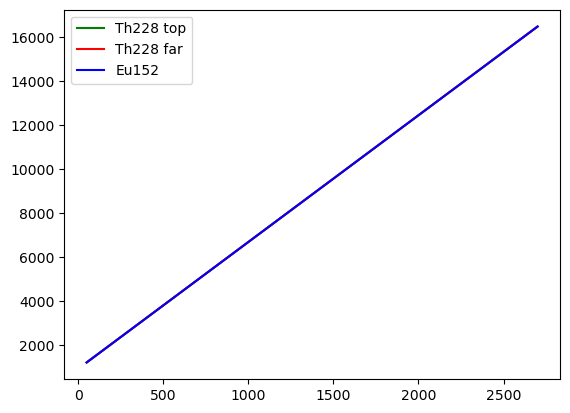

In [61]:
plt.plot(x, calfunc(E, a[0], b[0]), color = 'g', label = 'Th228 top')
plt.plot(x, calfunc(E, a[1], b[1]), color = 'r', label = 'Th228 far')
plt.plot(x, calfunc(E, a[2], b[2]), color = 'b', label = 'Eu152')
plt.legend()
plt.show()

/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/2428516678.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_top, Th_resid_top_err, color = 'g', marker = '.', fmt = '.', label = 'Th228_top')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/2428516678.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.', label = 'Th228_far')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/2428516678.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 

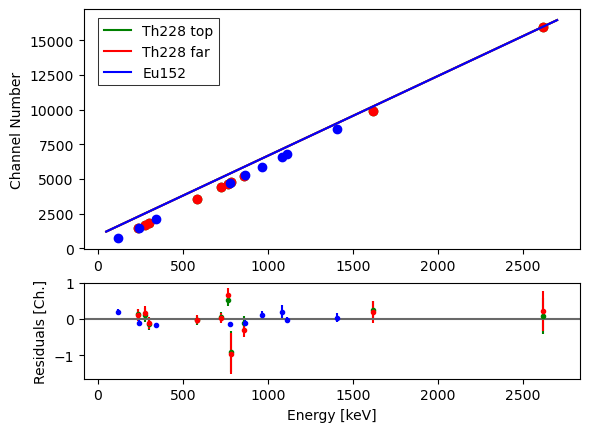

In [62]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.plot(x, calfunc(E, a[0], b[0]), color = 'g', label = 'Th228 top')
ax0.plot(x, calfunc(E, a[1], b[1]), color = 'r', label = 'Th228 far')
ax0.plot(x, calfunc(E, a[2], b[2]), color = 'b', label = 'Eu152')
ax0.scatter(E_Th, Th_peakpos_top, color = 'g')
ax0.scatter(E_Th, Th_peakpos_far, color = 'r')
ax0.scatter(E_Eu, Eu_peakpos, color = 'b')

ax0.set_ylabel('Channel Number')
#ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(E_Th, Th_resid_top, Th_resid_top_err, color = 'g', marker = '.', fmt = '.', label = 'Th228_top')
ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.', label = 'Th228_far')
ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.', label = 'Eu152')
ax1.set_yticks(np.arange(-1, 1.1, step=1))
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
ax1.axhline(y = 0, color = 'dimgray')
legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [63]:
#Calibration curve mean
print(a, b)
a_mean = np.mean(a)
b_mean = np.mean(b)
Th_resid_avg = []
Th_resid_err_avg = []
for i in range(len(Th_resid_top)):
    Th_resid_avg.append(0.5*(Th_resid_top[i] + Th_resid_far[i]))
    Th_resid_err_avg.append(0.5*(Th_resid_top_err[i] + Th_resid_far_err[i]))
print(Th_resid_avg, Th_resid_err_avg)

[6.101, 6.1, 6.099] [-2.834, -3.249, -3.204]
[0.1254125, 0.142338, -0.11483850000000001, -0.028787, 0.048422, 0.5991645, -0.9238835, -0.19892300000000002, 0.211937, 0.1495935] [0.152652, 0.1906805, 0.1610075, 0.1217345, 0.1386005, 0.17603649999999998, 0.563957, 0.18283, 0.285748, 0.5169779999999999]


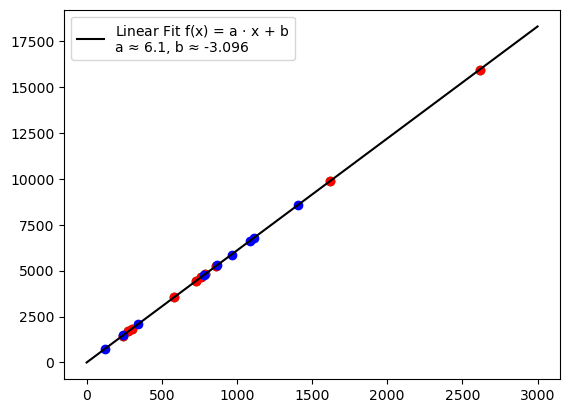

In [64]:
x_lim = np.linspace(0, 3000, 100)
plt.plot(x_lim, calfunc(x_lim, a_mean, b_mean), color = 'k', label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(a_mean,3))+', b ≈ '+str(round(b_mean,3)))
plt.scatter(E_Th, Th_peakpos_top, color = 'g')
plt.scatter(E_Th, Th_peakpos_far, color = 'r')
plt.scatter(E_Eu, Eu_peakpos, color = 'b')
plt.legend()
plt.show()

/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/4059045226.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_avg, Th_resid_err_avg, color = 'r', marker = '.', fmt = '.', label = 'Th228')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/4059045226.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.', label = 'Eu152')


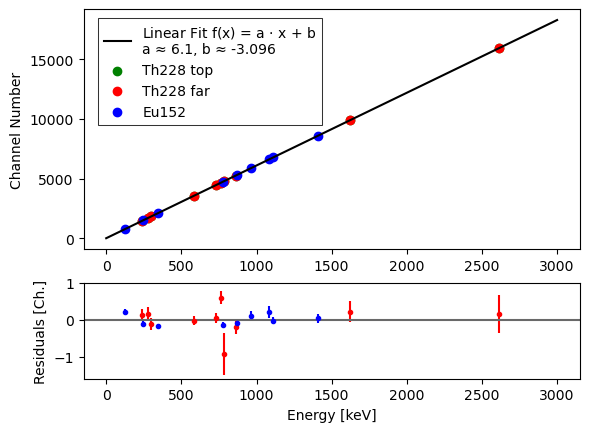

In [65]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
x_lim = np.linspace(0, 3000, 100)
ax0.plot(x_lim, calfunc(x_lim, a_mean, b_mean), color = 'k', label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(a_mean,3))+', b ≈ '+str(round(b_mean,3)))
ax0.scatter(E_Th, Th_peakpos_top, color = 'g', label = 'Th228 top')
ax0.scatter(E_Th, Th_peakpos_far, color = 'r', label = 'Th228 far')
ax0.scatter(E_Eu, Eu_peakpos, color = 'b', label = 'Eu152')

ax0.set_ylabel('Channel Number')
#ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(E_Th, Th_resid_avg, Th_resid_err_avg, color = 'r', marker = '.', fmt = '.', label = 'Th228')
ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.', label = 'Eu152')
ax1.set_yticks(np.arange(-1, 1.1, step=1))
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
ax1.axhline(y = 0, color = 'dimgray')
legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [66]:
#Calibration with points from Th228 and Eu152
df_Th228_far = pd.read_csv("Th228_far_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))
df_Th228_top = pd.read_csv("Th228_top_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))
df_Eu152 = pd.read_csv("Eu152_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))

In [78]:
merge1 = [df_Th228_top, df_Eu152]
df_calibration1 = pd.concat(merge1).sort_values(by=['e_lit'])
df_calibration1

,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0
0,Pb238,238.6320,0.0020,1452.990668,0.010876,3.141510,0.009761,4.513262,1453.0
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0
1,Tl277,277.3700,0.0200,1689.357801,0.049038,3.267484,0.034729,1.073887,1689.0
2,Pb300,300.0890,0.0120,1828.229959,0.026557,3.319151,0.027810,0.938595,1828.0
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0
3,Tl583,583.1870,0.0020,3555.394139,0.017392,3.905220,0.015753,1.929981,3555.0
4,Bi727,727.3300,0.0100,4434.746474,0.032532,4.193014,0.026755,1.411522,4435.0
5,Bi763,763.4500,0.0200,4654.664610,0.180676,4.092632,0.182971,1.257695,4656.0
3,Gd778,778.9040,0.0018,4747.202090,0.030784,4.185116,0.026034,1.832222,4748.0


In [79]:
def linFunc(E, m,q):
    lin = m*E+q
    return lin

In [80]:
popt, pcov = curve_fit(linFunc, df_calibration1.peak_position, df_calibration1.e_lit, 
                       p0=[np.median(df_calibration1.e_lit/df_calibration1.peak_position), 0], 
                       bounds=((0, -np.inf),
                               (+np.inf, +np.inf)), 
                       sigma=df_calibration1.peak_width, maxfev=10000)

cal_CE_a = popt[0]
print(cal_CE_a)
cal_CE_a_err = np.sqrt(pcov[0, 0])
print(cal_CE_a_err)
cal_CE_b = popt[1]
print('')
print(cal_CE_b)
cal_CE_b_err = np.sqrt(pcov[1, 1])
print(cal_CE_b_err)
cal_CE_cov_ab = pcov[0, 1]
cal_CE = (cal_CE_a, cal_CE_b)

cal_EC_a = 1/cal_CE_a
cal_EC_b = -cal_CE_b/cal_CE_a
cal_EC = (cal_EC_a, cal_EC_b)

print(popt, pcov)

0.16392752043210318
1.674982657068591e-05

0.5181251646392824
0.0776738353504633
[0.16392752 0.51812516] [[ 2.80556690e-10 -1.04035274e-06]
 [-1.04035274e-06  6.03322470e-03]]


In [81]:
reconstr_e = linFunc(df_calibration1.peak_position, *cal_CE)
df_calibration1['reconstr_e'] = reconstr_e
reconstr_e_err = np.sqrt(cal_CE_b_err**2 + (cal_CE_a_err*df_calibration1.peak_position)**2 + 2*(df_calibration1.peak_position)*cal_CE_cov_ab)
residuals_e = reconstr_e - df_calibration1.e_lit
residuals_e_err = np.sqrt(reconstr_e_err**2 + (df_calibration1.e_err_lit)**2)
print(residuals_e, residuals_e_err)

0   -0.072267
0    0.071283
1   -0.053695
1    0.080361
2    0.126329
2   -0.068578
3    0.158071
4    0.165118
5    0.095753
3   -0.188807
6    0.332414
7    0.215914
4   -0.218597
5   -0.275907
6   -0.325579
7   -0.294312
8   -0.382786
8    0.288224
9    0.482356
dtype: float64 0    0.068179
0    0.060052
1    0.059644
1    0.060982
2    0.057541
2    0.053903
3    0.046754
4    0.049229
5    0.053167
3    0.049815
6    0.102974
7    0.056924
4    0.053764
5    0.061792
6    0.071613
7    0.069549
8    0.094093
8    0.113936
9    0.210507
dtype: float64


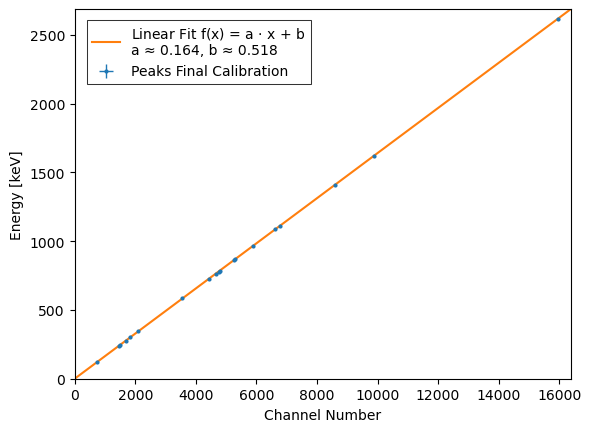

In [83]:
plt.errorbar(df_calibration1.peak_position, df_calibration1.e_lit, 
             xerr = df_calibration1.peak_width, yerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
plt.plot(np.linspace(0,16383,10), linFunc(np.linspace(0,16383,10), *popt), 
         label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(popt[0],3))+', b ≈ '+str(round(popt[1],3)))
plt.xlabel('Channel Number')
plt.ylabel('Energy [keV]')
#plt.xscale('log'); plt.yscale('log');
plt.xlim(0, 16383)
plt.ylim(0, linFunc(16383, *popt))
legend = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [84]:
chi2 = np.sum(residuals_e**2 / residuals_e_err**2)
print(chi2)
dof = len(residuals_e)-len(popt)
print(dof)

179.86071203494237
17


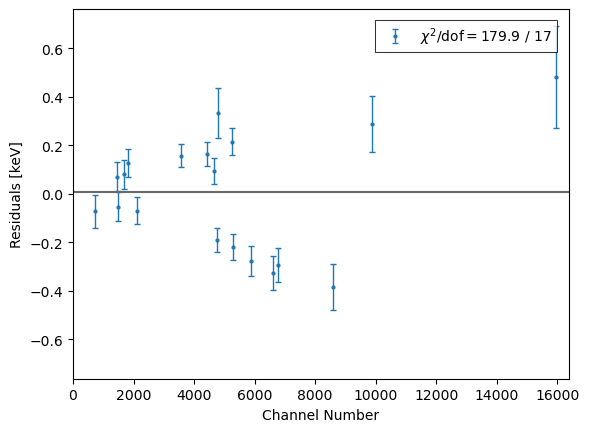

In [85]:
plt.errorbar(df_calibration1.peak_position, residuals_e, yerr = residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
plt.axhline(y=np.mean(residuals_e), color = 'dimgray')
plt.xlabel('Channel Number')
plt.ylabel('Residuals [keV]')
val_lim = max(np.abs(1.1*np.max(residuals_e+residuals_e_err)), np.abs(1.1*np.min(residuals_e-residuals_e_err)))
plt.xlim(0, 16383)
plt.ylim(-val_lim, val_lim)
legend = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

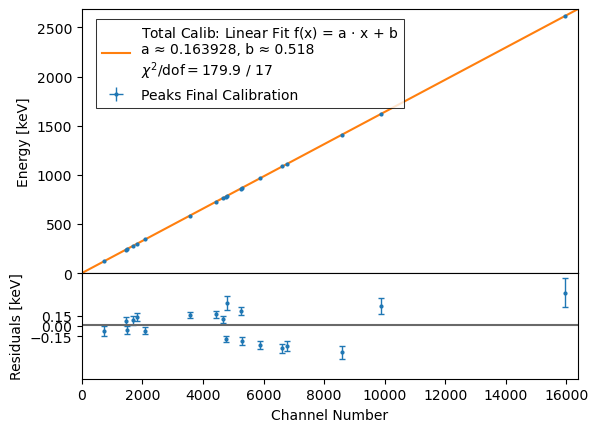

In [86]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar(df_calibration1.peak_position, df_calibration1.e_lit, 
             xerr = df_calibration1.peak_width, yerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
ax0.plot(np.linspace(0,16383,10), linFunc(np.linspace(0,16383,10), *popt), 
         label = 'Total Calib: Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(popt[0],6))+', b ≈ '+str(round(popt[1],3))+
         '\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Energy [keV]')
ax0.set_ylim(0, linFunc(16383, *popt))

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.peak_position, residuals_e, yerr = residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(residuals_e), color = 'dimgray')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Channel Number')
ax1.set_ylabel('Residuals [keV]')
val_lim = max(np.abs(1.1*np.max(residuals_e+residuals_e_err)), np.abs(1.1*np.min(residuals_e-residuals_e_err)))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_yticks(np.arange(-0.15, 0.16, step=0.15))
plt.xlim(0, 16383)

legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)

plt.subplots_adjust(hspace=.0)
plt.show()

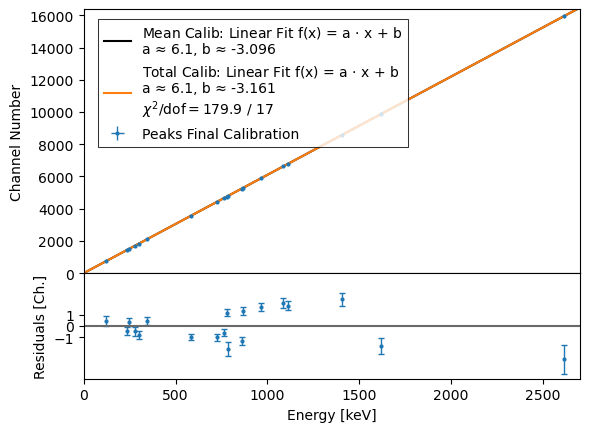

,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max,reconstr_e,isotope
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0,121.743227,$^{152}$Sm
0,Pb238,238.6320,0.0020,1452.368805,0.013606,2.797124,0.011871,1.313987,1453.0,238.646064,$^{212}$Pb
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0,244.688992,$^{152}$Sm
1,Tl277,277.3700,0.0200,1688.633622,0.076545,2.951129,0.065978,1.100181,1688.0,277.379991,$^{208}$Tl
2,Pb300,300.0890,0.0120,1827.484098,0.057109,2.883003,0.047617,1.150395,1827.0,300.143533,$^{212}$Pb
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0,344.264517,$^{152}$Gd
3,Tl583,583.1870,0.0020,3554.397987,0.024547,3.600576,0.020904,1.092073,3555.0,583.258709,$^{208}$Tl
4,Bi727,727.3300,0.0100,4433.667286,0.088468,3.930139,0.077443,1.290583,4434.0,727.408620,$^{212}$Bi
5,Bi763,763.4500,0.0200,4653.369663,0.242035,4.157343,0.215254,1.141774,4652.0,763.427253,$^{212}$Bi
3,Gd778,778.9040,0.0018,4747.202090,0.030784,4.185116,0.026034,1.832222,4748.0,778.810408,$^{152}$Gd


In [87]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar(df_calibration1.e_lit, df_calibration1.peak_position, 
             yerr = df_calibration1.peak_width, xerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
ax0.plot(x_lim, calfunc(x_lim, a_mean, b_mean), color = 'k', label = 'Mean Calib: Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(a_mean,3))+', b ≈ '+str(round(b_mean,3)))

ax0.plot(np.linspace(0,2700,10), linFunc(np.linspace(0,2700,10), *cal_EC), 
         label = 'Total Calib: Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(cal_EC[0],3))+', b ≈ '+str(round(cal_EC[1],3))+
         '\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Channel Number')
ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.e_lit, -cal_EC_a*residuals_e, yerr = cal_EC_a*residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(-cal_EC_a*residuals_e), color = 'dimgray')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
val_lim = max(np.abs(1.1*np.max(cal_EC_a*(residuals_e+residuals_e_err))), np.abs(1.1*np.min(cal_EC_a*(residuals_e-residuals_e_err))))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_yticks(np.arange(-1, 1.1, step=1))
plt.xlim(0, 2700)

legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)

plt.subplots_adjust(hspace=.0)
plt.show()
df_calibration

In [88]:
isotope_list = []
for i in df_calibration1['name']:
    if i.find('Tl') > -1:
        isotope_list.append('$^{208}$Tl')
    elif i.find('Bi') > -1:
        isotope_list.append('$^{212}$Bi')
    elif i.find('Pb') > -1:
        isotope_list.append('$^{212}$Pb')
    if i.find('Sm') == 0:
        isotope_list.append('$^{152}$Sm')
    elif i.find('Gd') == 0:
        isotope_list.append('$^{152}$Gd')
df_calibration1['isotope'] = isotope_list
df_calibration1

,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max,reconstr_e,isotope
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0,121.709433,$^{152}$Sm
0,Pb238,238.6320,0.0020,1452.990668,0.010876,3.141510,0.009761,4.513262,1453.0,238.703283,$^{212}$Pb
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0,244.643705,$^{152}$Sm
1,Tl277,277.3700,0.0200,1689.357801,0.049038,3.267484,0.034729,1.073887,1689.0,277.450361,$^{208}$Tl
2,Pb300,300.0890,0.0120,1828.229959,0.026557,3.319151,0.027810,0.938595,1828.0,300.215329,$^{212}$Pb
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0,344.209922,$^{152}$Gd
3,Tl583,583.1870,0.0020,3555.394139,0.017392,3.905220,0.015753,1.929981,3555.0,583.345071,$^{208}$Tl
4,Bi727,727.3300,0.0100,4434.746474,0.032532,4.193014,0.026755,1.411522,4435.0,727.495118,$^{212}$Bi
5,Bi763,763.4500,0.0200,4654.664610,0.180676,4.092632,0.182971,1.257695,4656.0,763.545753,$^{212}$Bi
3,Gd778,778.9040,0.0018,4747.202090,0.030784,4.185116,0.026034,1.832222,4748.0,778.715193,$^{152}$Gd


/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/1834685383.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_8537/1834685383.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.')


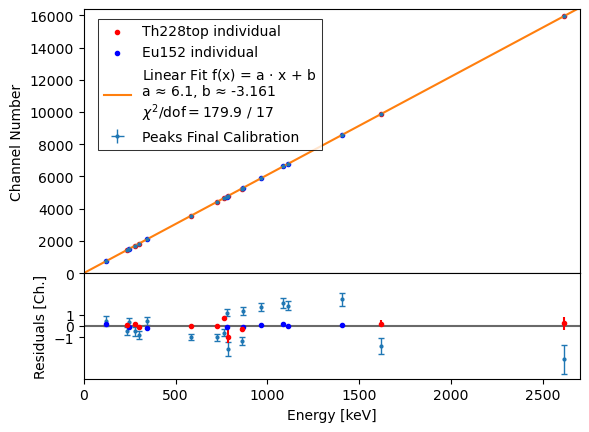

In [91]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.scatter(E_Th, Th_peakpos_far, color = 'r', marker = '.', label = 'Th228top individual')
ax0.scatter(E_Eu, Eu_peakpos, color = 'b', marker = '.', label = 'Eu152 individual')
ax0.errorbar(df_calibration1.e_lit, df_calibration1.peak_position, 
             yerr = df_calibration1.peak_width, xerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
ax0.plot(np.linspace(0,2700,10), linFunc(np.linspace(0,2700,10), *cal_EC), 
         label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(cal_EC[0],3))+', b ≈ '+str(round(cal_EC[1],3))+
         '\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Channel Number')
ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.e_lit, -cal_EC_a*residuals_e, yerr = cal_EC_a*residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(-cal_EC_a*residuals_e), color = 'dimgray')
ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.')
ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
val_lim = max(np.abs(1.1*np.max(cal_EC_a*(residuals_e+residuals_e_err))), np.abs(1.1*np.min(cal_EC_a*(residuals_e-residuals_e_err))))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_yticks(np.arange(-1, 1.1, step=1))
plt.xlim(0, 2700)

legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.subplots_adjust(hspace=.0)
plt.show()